In [ ]:
# Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany 



> # Exploratory Data Analyses and Data Visualization of 2016 ebay Car Sales in Germany Using Python and Business Inteligence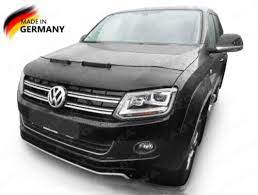
[Source of Picture](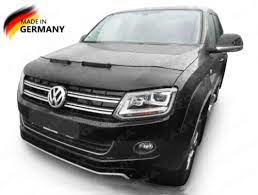)

## Mid-term-Project For the March 2023 Ironhack, Berlin By Evans and Festus 
## Dataset: Auto Sales ebay Germany Random 50k!

##  Table of Contents
1. [Description of the dataset](#2)

1. [Goals of the project¶](#3)

2. [Data Gathering and Methodology](#4)
   
3. [Data Analytics and Conclusion](#5) 
   
4. [References](#6)

#  Description of the dataset
The dataset used to complete this project was scraped in 2016 from ebay-Kleinanzeigan (Germany).
The data was made available publicly on the Kaggle by the user 'orgesleka'. 

The dataset contains seventeen columns with over 37 thousand rows of private used car listings for sale; 
the column headings and their descriptions are listed here:

**date_crawled:** When an ad was first crawled; all field-values are taken from this date.
name: Name of the car.

**price_EUR:** Listed price for the car.

**ab_test:** Whether the listing is included in an A/B test.

**vehicle_type:** The vehicle type.

**registration_year:** The year the car was first registered.

**transmission:** The transmission type.

**power_ps:** The power of the car in PS (PferdStarkeis, similar to horse power).

**model:** Car model name.

**odometer_km:** approximate kilometers the car has driven.

**registration_month:** The month the car was first registered.

**fuel_type:** Vehicle fuel type.

**brand:** Car brand.

**unrepaired_damage:** If the car has damage which is not yet repaired.

**date_created:** The date the eBay listing was created.

**postal_code:** The postal code for the location of the vehicle.

**last_seen_online:** When the crawler saw this ad last online.


# Goals of the project
## **Do data cleaning:**
    - identify and remove where applicable the outliers, missing data, duplicates, columns to drop
    - decide on the interesting features to keep
## **Carry out EDA and provide dataset summary:** 
    - Mean prices
    - max prices 
    - mode i.e most frequent car model
## **Investigate the underlying patterns and data structure:** 
    - Commonly listed brands
    - distribution of brands?
    - price variation between: 
        - relatively newer cars and older cars
        - fuel type
        - transmission type
        - car brands
        - mileage of the car
        - unrepaired_damage
    - correlations between the numerical features:
        - Price
        - power_ps 
        - mileage in Km
## **Assess the impact of Ab Testing:**
    - Viewership of the cars
## **Business Inteligence - Build a Tableau Dashboard:**
    - Are their any meaningful KPIs?
    - show impact of AB testing of such KPI.
    - comparing the transmission types, fuel types brands and prices
    - filter by top 3 model, brand, fuel types etc 
    - show an important insight/pattern about the sale of cars
    - design a clean and well readable charts that have titles, labels etc. 
## **Reveal the bigger picture:** 
     - Relate the data to the opportunity for sellers and buyers.
     - Recommnedation about the AB testing whether to launch or not to launch it.
     - Conclusion.

# Data Gathering and Methodology

1. Python libraries below will be used for EDA and for data wrangling. 
1. Dataset is publicly available in [kaggle](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned) in the format comma-separated value (CSV) file, a tabular format contained in [a zipped file](https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1)

1. Tableau will be used for visualizations and Dashboard design. 



## Loading the libraries and modules

In [ ]:
# import libraries 
# data cleaning
import pandas as pd
import numpy as np
import datetime as dt
#import os
from scipy import stats
#data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import matplotlib.pyplot as plt

#from requests.auth import HTTPBasicAuth
#from zipfile import ZipFile
#import io

#visualazation libraries
#import plotly.express as px
#import plotly.offline as pyo
#import plotly.graph_objs as go
#Set notebook mode to work in offline
#pyo.init_notebook_mode()




## Loading Data


In [ ]:
#dataset
#df = pd.read_csv('https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned/download?datasetVersionNumber=1.zip',compression='zip')
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data
#https://www.kaggle.com/datasets/tjelailah/ebay-car-sales-data/download?datasetVersionNumber=1
#https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen
#df = pd.read_csv('autos_random_50k_cleaned.csv')
#df = pd.read_csv('autos_random_50k.csv', encoding = 'ISO-8859-1')
df = pd.read_csv('autos.csv', encoding = 'ISO-8859-1')
#df = pd.read_csv("https://www.kaggle.com/datasets/sijovm/used-cars-data-from-ebay-kleinanzeigen.csv", encoding = 'ISO-8859-1')
#print(df)

df

In [ ]:
df.isna().sum()

<a id = "3"></a><br>

## Data Wrangling: Cleaning

1. We drop the first column **'unnamed'**:
1. Standardize the column names e.g price should all be in lower case
1. Convert the German words to english e.g transmission column
1. Remove Nan values
1. Remove duplicates
1. Review the regsitration year and prices of vehicles


  

### Exploring the data to know what to clean

In [ ]:
#Drop the first column
#df=df.drop(df.columns[0], axis=1)
#df

In [ ]:
# change to lower case
df.columns = df.columns.str.lower()
df

In [ ]:
##Change column lastSeen and dateCreated to date or date time
# convert the 'Date' column to datetime format
df['lastseen']= pd.to_datetime(df['lastseen'])
df['datecreated']= pd.to_datetime(df['datecreated'])
df["viewer_index"]=(df["lastseen"]) - (df["datecreated"])
df

In [ ]:
df.columns

In [ ]:
#Rename columns with list
column_names = ['date_crawled', 'name', 'seller', 'offer_type', 'price_eur', 'ab_test',
       'vehicle_type', 'year_registration', 'transmission', 'power_hp', 'model',
       'mileage_km', 'month_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'date_created', 'number_pictures', 'postal_code',
       'last_seen','viewer_index']
df.columns = column_names
df

In [ ]:
du= df.duplicated().sum()
du

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df


In [ ]:
df['transmission'].unique()

In [ ]:
#drop missing values
df=df.dropna(subset=['transmission'])
df

In [ ]:
df['transmission'].unique()#translate to  German

In [ ]:
#unrepaired_damage
df['unrepaired_damage'].unique()#translate to  German

In [ ]:
#drop missing values
df=df.dropna(subset=['unrepaired_damage'])
df

In [ ]:
df['date_crawled'].min()#no change

In [ ]:
df['date_crawled'].max()#no change

In [ ]:
df['date_crawled'].mode()#no change

In [ ]:
df['ab_test'].unique()#No changes

In [ ]:
df.isna().sum()

In [ ]:
df['vehicle_type'].unique()# to translate 'kleinwagen', 'andere', to German 

In [ ]:
#df['registration_year'].unique()#
df['year_registration'].unique()#To remove outliers

In [ ]:
df['year_registration'].min()

In [ ]:
df['year_registration'].max()

In [ ]:
df['year_registration'].mode()


In [ ]:
df['year_registration'].mean()

In [ ]:
df['power_hp'].unique()

In [ ]:
df['power_hp'].max()

In [ ]:
df['power_hp'].min()

In [ ]:
df['power_hp'].mean()

In [ ]:
df['model'].unique()

In [ ]:
#drop missing values
df=df.dropna(subset=['model'])
df

In [ ]:
df['model'].mode()

In [ ]:
df['mileage_km'].unique()

In [ ]:
df['mileage_km'].max()

In [ ]:
df['mileage_km'].min()

In [ ]:
df['mileage_km'].mean()

In [ ]:
df['month_registration'].unique()

In [ ]:
df['month_registration'].mode()

In [ ]:
df['fuel_type'].unique()#translate to German


### Change German words to English

In [ ]:
#Transmission - Standardize - translate German to English
#drop missing values
df=df.dropna(subset=['transmission'])
df
df.loc[df['transmission'].str.contains('manuell'),"transmission"] = 'manual'
df.loc[df['transmission'].str.contains('automatik'),"transmission"] = 'automatic'
#df.loc[df['transmission'].str.contains('Unknown'),"transmission"] = 'unknown'
df

In [ ]:
#unrepaired_damage: Standardize - translate German to English
df.loc[df['unrepaired_damage'].str.contains('nein'),"unrepaired_damage"] = 'no'
df.loc[df['unrepaired_damage'].str.contains('ja'),"unrepaired_damage"] = 'yes'
#df.loc[df['unrepaired_damage'].str.contains('nan'),"unrepaired_damage"] = 'unknown'
df

In [ ]:
#drop missing values
df=df.dropna(subset=['vehicle_type'])
#May be we should cjhange these NaN to unknown
df.loc[df['vehicle_type'].str.contains('andere'),"vehicle_type"] = 'other'
df.loc[df['vehicle_type'].str.contains('kleinwagen'),"vehicle_type"] = 'small_car'
df

In [ ]:
#fuel type
df=df.dropna(subset=['fuel_type'])#drop missing values
df.loc[df['fuel_type'].str.contains('andere'),"fuel_type"] = 'other'
df.loc[df['fuel_type'].str.contains('benzin'),"fuel_type"] = 'petrol'
df.loc[df['fuel_type'].str.contains('elektro'),"fuel_type"] = 'elektric'


In [ ]:
df['seller'].unique()

In [ ]:
df.loc[df["seller"].str.contains('privat'),("seller")] = 'private'
df.loc[df["seller"].str.contains('gewerblich'),("seller")] = 'company'

In [ ]:
df['offer_type'].unique()

In [ ]:
df.loc[df["offer_type"].str.contains('Angebot'),("offer_type")] = 'offer'
df.loc[df["offer_type"].str.contains('Gesuch'),("offer_type")] = 'search'

In [ ]:
df['offer_type'].unique()

In [ ]:
df['fuel_type'].unique()

In [ ]:
df['brand'].unique()

In [ ]:
df['brand'].unique()

In [ ]:
df.loc[df['brand'].str.contains('sonstige_autos'),('brand')] = 'other'


In [ ]:
df['brand'].unique()

In [ ]:
df['brand'].mode()

In [ ]:
df["transmission"].unique()

In [ ]:
sns.histplot(df["year_registration"])

### Detecting outliers by visualization, and deciding whether to remove

In [ ]:
df

In [ ]:
#outliers
#we can decide to drop od cars registered before 1980
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

In [ ]:
sns.histplot(df["year_registration"])

In [ ]:
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape

In [ ]:
#This price column is tricky. We have cars that cosr zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
sns.boxplot(df['price_eur'])#huge impact of outliers on price_eur column
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [ ]:
#This is the expect clean plot without outliers
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["power_hp"].min(), df["power_hp"].max(), df.shape

In [ ]:
#power_PS
sns.boxplot(df['power_hp'])
df["power_hp"].min(), df["power_hp"].max(), df.shape#Huge but this column of not important to us

In [ ]:
#We can drop this column because it has many outliers, which if we remove, we will impact heavily on the entire fetures of the data set
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"power_hp")
df["power_hp"].min(), df["power_hp"].max(), df.shape

In [ ]:
#drop 'number_pictures' column
df.drop('number_pictures', axis=1, inplace=True)
df

In [ ]:
#mileage_km: No need to change anything here because its obvious we have low mileages of cars
sns.boxplot(df['mileage_km'])
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

In [ ]:
sns.histplot(df["mileage_km"])

In [ ]:
#This leave this column as it is, because its reality to have cars with mileage less than 20000
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"mileage_km")
df["mileage_km"].min(), df["mileage_km"].max(), df.shape

### Remove outliers in the year of Registration and price_eur columns but carefully using boxplot visualization and interquartile range or z score 

In [ ]:
df["z_score_yr"]= stats.zscore(df["year_registration"])
df1 =df.loc[df["z_score_yr"].abs()<=2]
def plot_boxplot(df1, ft):
    df1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df1,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape
##
# IQR
Q1 = np.percentile(df['year_registration'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['year_registration'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
df2=df
# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df2['year_registration'] < (Q1 - 1.5 * IQR)) | (df2['year_registration'] > (Q3 + 1.5 * IQR)))#.any(axis=1)

# Filter our dataframe based on condition
df2 = df2[condition]
df2['year_registration'].min(), df2['year_registration'].max(), df2.shape

In [ ]:
#year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

In [ ]:
sns.histplot(df["year_registration"])

In [ ]:
#The best optimal threshold is 1987 as cut off
df=df[df["year_registration"]>1987]
#we can decide to drop od cars registered before 1980
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"year_registration")
df["year_registration"].min(), df["year_registration"].max(), df.shape,

#df["year_registration"].unique()

In [ ]:
#confirm or recheck the efeect of removal of outliers on year_registration 
sns.boxplot(df['year_registration'])
df["year_registration"].min(), df["year_registration"].max(), df.shape

In [ ]:
#Price_eur
df["z_score_pr"]= stats.zscore(df["price_eur"])
df1 =df.loc[df["z_score_pr"].abs()<=2]
def plot_boxplot(df1, ft):
    df1.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df1,"price_eur")
df1["price_eur"].min(), df1["price_eur"].max(), df1.shape

In [ ]:
sns.histplot(df1["year_registration"])

In [ ]:
df1["price_eur"].min(), df1["price_eur"].max(), df1.shape

In [ ]:
# IQR
Q1 = np.percentile(df["price_eur"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df["price_eur"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
df2=df
# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df2["price_eur"] < (Q1 - 1.5 * IQR)) | (df2["price_eur"] > (Q3 + 1.5 * IQR)))#.any(axis=1)

# Filter our dataframe based on condition
df2 = df2[condition]
df2["price_eur"].min(), df2["price_eur"].max(), df2.shape

In [ ]:
sns.boxplot(df2["price_eur"])

In [ ]:
#This price_eur column is tricky. We have cars that cost zero Euros. We have to think how to deal with this.  Evans tried interquartile range and z score methods later below
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [ ]:
#price_eur check with seaborn reveal huge effect of outliers
sns.boxplot(df['price_eur'])
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [ ]:
sns.histplot(df["price_eur"])

In [ ]:
dfab= df[df["price_eur"]>100000]
dfab

In [ ]:
#The best upper threshold =14666, lower = we choose 500
df=df[df["price_eur"]<20000]
df=df[df["price_eur"]>500]
sns.boxplot(df['price_eur'])

df["price_eur"].min(), df["price_eur"].max(), df.shape

In [ ]:
sns.histplot(df["price_eur"])

In [ ]:
#Check
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()
plot_boxplot(df,"price_eur")
df["price_eur"].min(), df["price_eur"].max(), df.shape

In [ ]:
df

In [ ]:
abtest= df[df["ab_test"]=="test"]
abtest = abtest[["ab_test","viewer_index"]]

In [ ]:
abtest

In [ ]:
abcontrol = df[df["ab_test"]=="control"]
abcontrol= abcontrol[["ab_test","viewer_index"]]
abcontrol

In [ ]:
df.isna().sum()

In [ ]:
#Now have a clean file
#we can write it to our directory
df.to_csv("car_cleaned.csv", index=False)

### Mean, Max, min and mode for diffrent variables

In [ ]:
df['year_registration'].mode(),(df['year_registration'].min()),df['year_registration'].max()#2006#1988#2018

In [ ]:
df['power_hp'].min(),df['power_hp'].max()#(0, 20000)


In [ ]:
df['mileage_km'].mean(), df['mileage_km'].min(),df['mileage_km'].max()#126851, 5000, 150000

In [ ]:
df['price_eur'].mean(), df['price_eur'].min(),df['price_eur'].max()#5435, 501, 19999

In [ ]:
df['model'].mode()


In [ ]:
df['brand'].mode()

### Hypothesis testing: Factors impacting on prices, are the significant?

#### Prices verses age of the car: Older and newer cars. 

In [ ]:
#age_group<2018>2003=newer
df['age_group']=np.where((df['year_registration']>2003),"newer","older")

df

In [ ]:
age_new= df[df["age_group"]=="newer"]
age_new = age_new[["price_eur"]]
age_new = age_new.rename(columns={'price_eur':"age_newer_price"})
age_new
#


In [ ]:
age_old= df[df["age_group"]=="older"]
age_old = age_old[["price_eur"]]
age_old = age_old.rename(columns={'price_eur':"age_older_price"})
age_old
#


In [ ]:
sns.histplot(age_old["age_older_price"])


In [ ]:
sns.histplot(age_new["age_newer_price"])

In [ ]:
df.head()

#### Prices verses unrepaired damaged: damaged and repaired. 

In [ ]:
damaged= df[df["unrepaired_damage"]=="yes"]
damaged = damaged[["price_eur"]]
damaged = damaged.renamere(columns={'price_eur':"price_damaged"})
damaged

In [ ]:
repaired= df[df["unrepaired_damage"]=="no"]
repaired = repaired[["price_eur"]]
repaired = repaired.rename(columns={'price_eur':"price_repaired"})
repaired

### To find the commonly listed brand

In [ ]:
#Counts the occurence of each unique value

counts = df['brand'].value_counts()

In [ ]:
#  find the most common value (i.e., the value with the highest count)

most_common_value = counts.idxmax()

most_common_value

### Distribution of brands?

In [ ]:
# create a bar chart of the value counts

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values, width=0.8)
plt.title("Brand Distribution")  
plt.xticks(rotation=90, size=9) #"vertical"
plt.show()

In [ ]:
#drop missing values
df=df.dropna(subset=["price_eur"])
df

In [ ]:
#outliers
#create a histogram

sns.histplot(df["price_eur"])

In [ ]:
df=df.sort_values(by="price_eur", ascending=False)
#df.dtypes
df

In [ ]:
#outliers
#create a histogram

sns.histplot(df["year_registration"])

In [ ]:
#outliers
#create a histogram

#sns.histplot(df["power_hp"])#dropped

In [ ]:
#outliers
#create a histogram
sns.histplot(df["mileage_km"])

In [ ]:
df

In [ ]:
sns.histplot(df['mileage_km']
           ,color = 'navy'
            ,kde = True
            )

In [ ]:
#outliers
#create a histogram
sns.histplot(df["month_registration"],kde = True)##be categorical

### Price variation between: relatively newer cars and older cars

In [ ]:
df = pd.read_csv('car_cleaned.csv', encoding = 'ISO-8859-1')

In [ ]:
df['fuel_type'].unique()

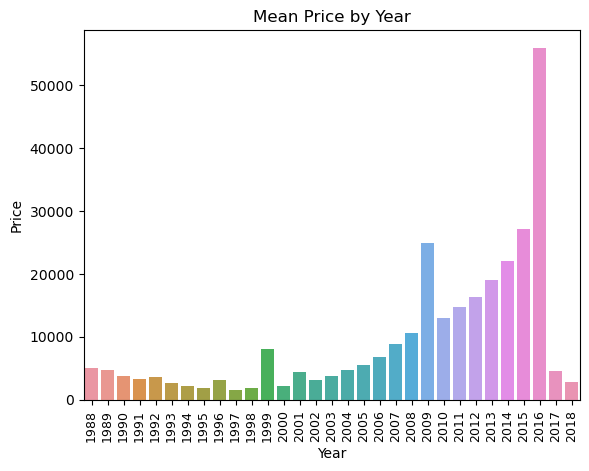

In [182]:
#year of registration
mean_prices = df.groupby('year_registration')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by Year")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

In [ ]:
### Price variation between fuel_type and prices

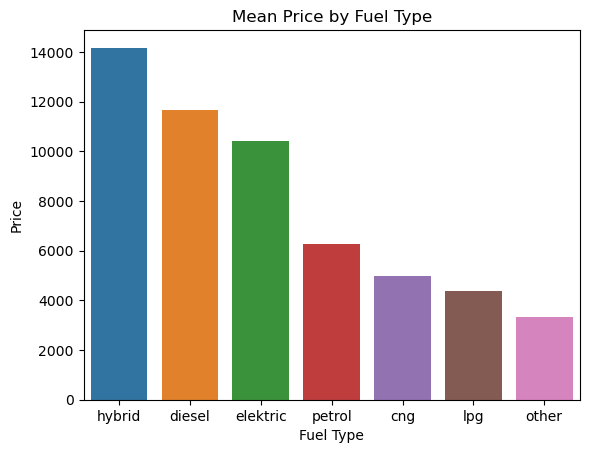

In [183]:
#df.boxplot(column='price_eur', by='fuel_type')

# set the chart title and axis labels
#plt.title('Price Variations by Fuel Type')
#plt.xlabel('Fuel Type')
#plt.ylabel('Price')

# display the chart
#plt.show()


mean_prices = df.groupby('fuel_type')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

# display the chart
plt.show()

### Price variation between transmission type and prices

In [ ]:
mean_prices = df.groupby('transmission')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by transmission")
plt.xlabel("Transmission")
plt.ylabel("Price")

# display the chart
plt.show()


In [ ]:
df.columns

### Price variation between transmission type and prices

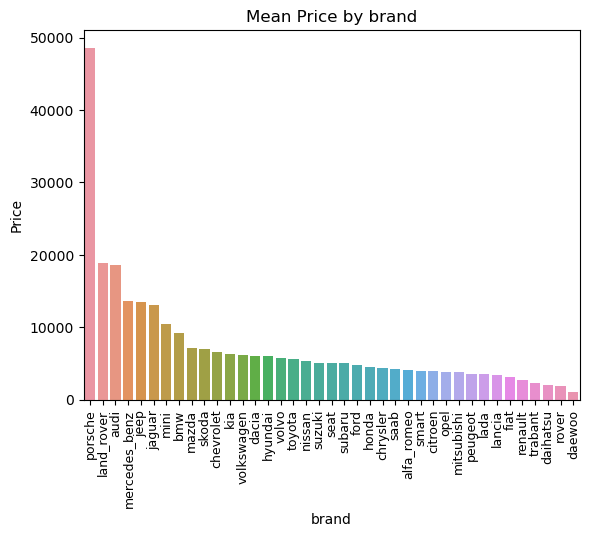

In [181]:
mean_prices = df.groupby('brand')['price_eur'].mean().sort_values(ascending=False)

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by brand")
plt.xlabel("brand")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Price variation between car mileage and prices

In [ ]:
mean_prices

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '5000'),
  Text(1, 0, '10000'),
  Text(2, 0, '20000'),
  Text(3, 0, '30000'),
  Text(4, 0, '40000'),
  Text(5, 0, '50000'),
  Text(6, 0, '60000'),
  Text(7, 0, '70000'),
  Text(8, 0, '80000'),
  Text(9, 0, '90000'),
  Text(10, 0, '100000'),
  Text(11, 0, '125000'),
  Text(12, 0, '150000')])

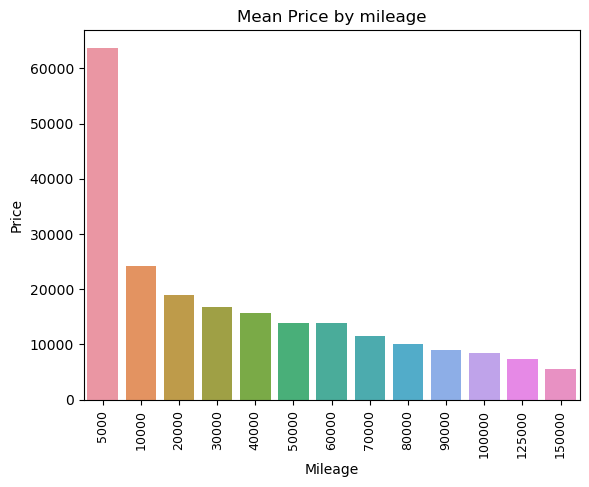

In [180]:
mean_prices = df.groupby('mileage_km')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
sns.barplot(mean_prices.index, mean_prices.values)

# set the chart title and axis labels
plt.title("Mean Price by mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 



### Price variation between unrepaired_damage and prices

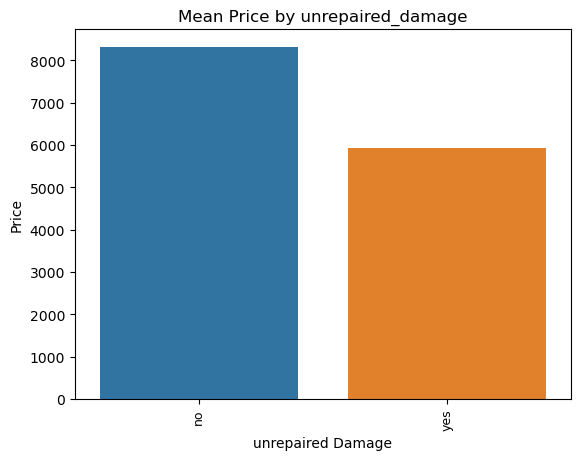

In [179]:
mean_prices = df.groupby('unrepaired_damage')['price_eur'].mean()

# create a bar chart of the mean prices for each fuel type
#plt.bar(mean_prices.index, mean_prices.values)
sns.barplot(mean_prices.index, mean_prices.values)
# set the chart title and axis labels
plt.title("Mean Price by unrepaired_damage")
plt.xlabel("unrepaired Damage")
plt.ylabel("Price")
plt.xticks(rotation="vertical", size=9) 

# display the chart
plt.show()

### Correlation between numerical features

In [185]:
#numericals
numericals=df.select_dtypes(include = np.number)
numericals

,price_eur,year_registration,power_hp,mileage_km,month_registration,postal_code,viewer_index,z_score_yr,z_score_pr
3,1500,2001,75,150000,6,91074,0 days 17:40:17,-0.354647,-0.019014
4,3600,2008,69,90000,7,60437,6 days 10:17:21,0.720260,-0.012923
5,650,1995,102,150000,10,33775,2 days 19:17:07,-1.275996,-0.021479
6,2200,2004,109,150000,8,67112,4 days 18:18:39,0.106027,-0.016983
10,2000,2004,105,150000,12,96224,11 days 10:45:34,0.106027,-0.017563
...,...,...,...,...,...,...,...,...,...
371520,3200,2004,225,150000,5,96465,0 days 20:44:43,0.106027,-0.014083
371521,1150,2000,0,150000,3,26624,2 days 10:17:23,-0.508206,-0.020029
371524,1199,2000,101,125000,3,26135,6 days 18:17:12,-0.508206,-0.019886
371525,9200,1996,102,150000,3,87439,19 days 07:15:26,-1.122438,0.003317


In [ ]:
df

In [ ]:
numericals.columns

In [186]:
numericals=numericals[['price_eur', 'year_registration', 'power_hp', 'mileage_km']]
numericals

,price_eur,year_registration,power_hp,mileage_km
3,1500,2001,75,150000
4,3600,2008,69,90000
5,650,1995,102,150000
6,2200,2004,109,150000
10,2000,2004,105,150000
...,...,...,...,...
371520,3200,2004,225,150000
371521,1150,2000,0,150000
371524,1199,2000,101,125000
371525,9200,1996,102,150000


In [ ]:
#numericals.drop('viewer_index', axis=1, inplace=True)
#numericals.drop('postal_code', axis=1, inplace=True)
#numericals.drop('power_hp', axis=1, inplace=True)
#numericals

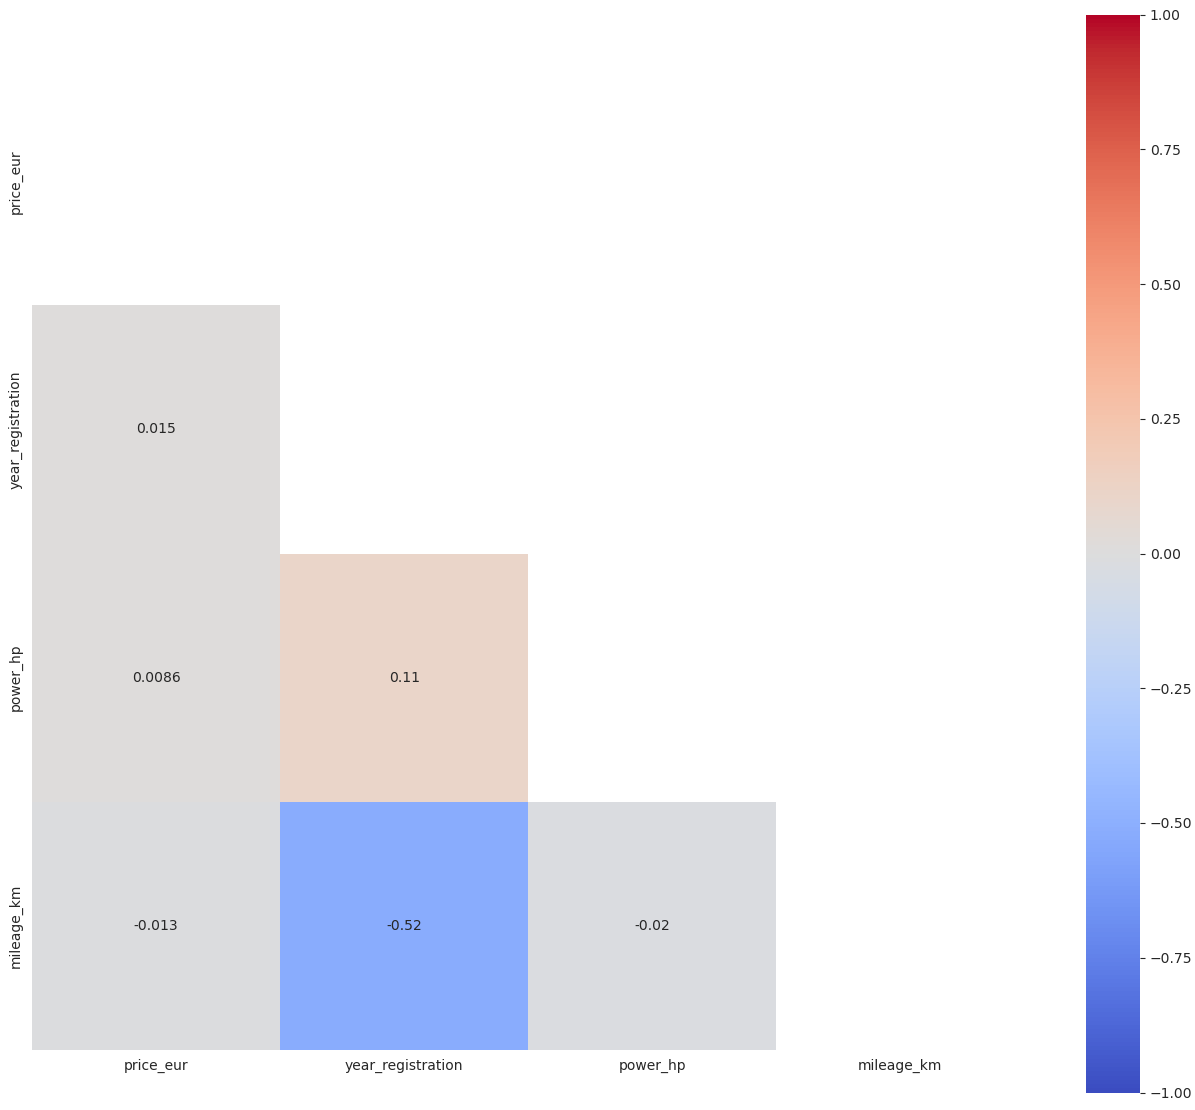

In [187]:
corr =numericals.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True # trick to filter out the upper-right triangle, which is redundant due to symmetry
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 14))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

# Data Analytics and Conclusion

## Data Cleaning<br>

1. **What was done?** <br>
EDA?<br> Data cleaning? <br> Missing values? <br> Duplicates?<br> outliers<br> columns to drop<br>

1. **How was it done?** <br> 
1. **Results Summary**<br>
    1. Firstly, we standardized the columns by making it all lower case and adding underscore where applicable
    1. Then, we checked for dupöiacted rows where we noticed 4 dupöicated rows. We removed them
    1. We also checked each  columns to change German words to english for better uniformity. This was applicable in offer_type, seller, transmission, fuel_type and unrepaired damage.
    1. We also checked for missing values and dropped them where applicable in specific columns
    1. Worked with IQR and Z score to remove the outliers from price, year of registration
    1. We removed from years before 1987 and retained 1988 to 2018
    1. For price: We removed outliers that are less than 500Eur and more than 20000Eur
   
    

## Exploration Data Analyses<br>
1. **EDA and summary of dataset**<br>
Mean prices<br> max prices <br>
mode i.e most frequent car model<br>
1. **Results Summary**<br>

1. **Underlying patterns and data structure:**<br>
Commonly listed brands<br>
Brand distribution? <br> Newer and older cars?<br> fuel type?<br> transmission type?<br> mean prices?<br> most frequent brand?<br>mileage of the car<br> unrepaired_damage?

1. **Any correlations?** <br> Numerical features: <br> Price?<br> power_hp?<br> mileage in Km?<br>
    1. We found strong positive correlation between price variation and year of regiszration which is 0.66 and weak negative correlation between price and mileage_km, also weak negative correlation between year of registration and mileage
1. **Results Summary**<br>
     1. We checked the mean, max, min and mode of specific features. This included year_registration, power_hp, mileage_km, price_eur, mode and brand
     1. We checked for the commonly listed brands and dicovered that the most commonly listed brands in order are Volkswagen, BMW, Opel, Mercedes and Ford.
     1. With seaborn and matplotlib, we visualised the underlying pattern between price and different variables. These variables included newer and older cars, fuel_type, transmission_type, mean_prices, most_frequent_brand, mileage_of_the_car and unrepaired_damage.
         1. For prices, we have the  mean of 5435Eur
         1. For year of registration, we discovered that cars registered between 2000 and 2010 were more in number
         1. Fuel_type, hybrid appears to be the most expensive, followed by electric and diesel
         1. With price, we observe that tere is a trend of price increase between 2000 and 2015
         1. Transmission, automatic cars are likely to attract higher prices than manual
         1. Brand: Porsche was the most expensive vehicle followed by mini, land_rover and daewoo was least expensive
         1. Mileage, the lower the ,mileage the less expensive. but the lowest mileage had a high price
         1. Vehicles that are not damaged turns out to be more expensive than vehicles that  are damaged.
         
   
    



## Business Intelligence<br>
1. **Ab Testing on viewership of the cars?** <br>

1. **Final Design of a Tableau Dashboard and take home message?** <br>
1. **Results Summary**<br>

## Conclusions<br>
1. **Bigger picture**<br>
1. **Recommendations**<br>
1. **Summary**<br>
1. **Results Summary**<br>


In [ ]:
#code
#Do data cleaning


In [ ]:
#code
#EDA and provide summary into the dataset

In [ ]:
#code

In [ ]:
#code

In [ ]:
#code


# References
1. https://www.kaggle.com/datasets/shaunoilund/auto-sales-ebay-germany-random-50k-cleaned